In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
dataset=pd.read_csv("smartphonesdatapreprocessing data.csv")

In [4]:
dataset

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,brand_name,model,processor_brand,os
0,54999.0,89.0,1.0,1.0,0.0,8.0,3.2,5000.0,1.0,100.0,...,50.0,16.0,0.0,0.0,1440.0,3216.0,oneplus,OnePlus 11 5G,snapdragon,android
1,19989.0,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1.0,33.0,...,64.0,16.0,1.0,1024.0,1080.0,2412.0,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon,android
2,16499.0,75.0,1.0,0.0,0.0,8.0,2.4,5000.0,1.0,15.0,...,50.0,13.0,1.0,1024.0,1080.0,2408.0,samsung,Samsung Galaxy A14 5G,exynos,android
3,16999.0,80.0,1.0,1.0,0.0,8.0,2.2,5000.0,1.0,25.0,...,50.0,8.0,1.0,1024.0,1080.0,2408.0,NaN,NaN,NaN,NaN
4,29999.0,86.0,1.0,0.0,1.0,8.0,2.6,4980.0,1.0,120.0,...,200.0,16.0,0.0,0.0,1080.0,2400.0,realme,Realme 10 Pro Plus,dimensity,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,poco,Poco M6 Pro,dimensity,android
629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,oppo,OPPO A97 5G,dimensity,android
630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,samsung,Samsung Galaxy A24,exynos,android
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,infinix,Infinix Note 13 Pro,helio,android


In [5]:
dataset.isnull().sum()

price                        136
rating                       136
has_5g                       136
has_nfc                      136
has_ir_blaster               136
num_cores                    136
processor_speed              136
battery_capacity             136
fast_charging_available      136
fast_charging                136
ram_capacity                 136
internal_memory              136
screen_size                  136
refresh_rate                 136
num_rear_cameras             136
num_front_cameras            136
primary_camera_rear          136
primary_camera_front         136
extended_memory_available    136
extended_upto                136
resolution_width             136
resolution_height            136
brand_name                   136
model                        136
processor_brand              136
os                           136
dtype: int64

In [6]:
dataset.cov()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,2.173168e+08,61986.962631,3607.569108,4171.898613,-350.041219,183.935249,4268.030319,-1.103113e+06,0.0,250140.026502,...,401.081655,194104.504466,853.162718,328.777796,56186.211689,45824.979801,-4314.609171,-2.516203e+06,884718.385352,2.637586e+06
rating,6.198696e+04,36.715754,1.658820,1.489806,0.218849,0.332122,1.535185,-3.800681e+02,0.0,114.358985,...,0.267037,91.340783,1.386756,0.155299,84.239806,35.498944,-1.312841,-4.735884e+02,529.362449,1.528139e+03
has_5g,3.607569e+03,1.658820,0.240564,0.099744,0.015403,0.012089,0.105085,-1.766786e+01,0.0,7.133839,...,0.012964,7.679103,-0.018165,0.002836,3.015642,1.016239,-0.114652,-4.308379e+01,17.282615,7.218321e+01
has_nfc,4.171899e+03,1.489806,0.099744,0.232021,-0.010190,0.003310,0.100342,-5.228044e+01,0.0,6.125410,...,0.008798,5.143782,0.018356,0.002365,1.103853,1.168050,-0.113268,-7.858662e+01,27.757578,4.911637e+01
has_ir_blaster,-3.500412e+02,0.218849,0.015403,-0.010190,0.159838,0.004016,0.008800,9.027179e+00,0.0,2.340259,...,0.006473,1.319899,0.034234,-0.002393,2.960720,-0.197159,-0.009545,-4.901668e-01,9.375714,2.628175e+01
num_cores,1.839352e+02,0.332122,0.012089,0.003310,0.004016,0.072175,0.007495,1.156254e+01,0.0,0.651644,...,0.008224,0.729336,0.023179,0.000649,0.866789,0.243400,0.005322,6.326475e+00,7.114623,1.482996e+01
processor_speed,4.268030e+03,1.535185,0.105085,0.100342,0.008800,0.007495,0.158221,-2.208798e+01,0.0,8.265905,...,0.014272,6.191302,0.006440,0.006213,1.752505,1.252613,-0.129666,-7.718228e+01,17.858953,6.183149e+01
battery_capacity,-1.103113e+06,-380.068066,-17.667862,-52.280445,9.027179,11.562545,-22.087980,8.508305e+05,0.0,-2816.539544,...,39.887506,1028.169168,-14.119848,-15.097249,1608.059129,-1015.596673,58.958205,1.007441e+05,-3070.489867,-2.701339e+04
fast_charging_available,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
fast_charging,2.501400e+05,114.358985,7.133839,6.125410,2.340259,0.651644,8.265905,-2.816540e+03,0.0,1125.999878,...,1.691743,488.015780,1.945642,-0.033759,391.044189,112.832324,-9.228034,-5.435146e+03,1571.323643,4.421428e+03


In [7]:
dataset.corr()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.000000,0.693949,0.498945,0.587521,-0.059393,0.046443,0.727860,-0.081124,NaN,0.505670,...,0.155058,0.489824,0.093082,0.126224,0.141099,0.305447,-0.619011,-0.365295,0.233381,0.443780
rating,0.693949,1.000000,0.558158,0.510434,0.090340,0.204022,0.636945,-0.068001,NaN,0.562438,...,0.251162,0.560776,0.368091,0.145053,0.514674,0.575665,-0.458236,-0.167270,0.339730,0.625524
has_5g,0.498945,0.558158,1.000000,0.422188,0.078550,0.091742,0.538634,-0.039052,NaN,0.433450,...,0.150643,0.582433,-0.059568,0.032720,0.227617,0.203592,-0.494389,-0.187994,0.137025,0.365029
has_nfc,0.587521,0.510434,0.422188,1.000000,-0.052915,0.025580,0.523703,-0.117667,NaN,0.378968,...,0.104100,0.397255,0.061291,0.027788,0.084838,0.238275,-0.497334,-0.349164,0.224091,0.252912
has_ir_blaster,-0.059393,0.090340,0.078550,-0.052915,1.000000,0.037391,0.055335,0.024479,NaN,0.174443,...,0.092277,0.122815,0.137719,-0.033881,0.274156,-0.048457,-0.050495,-0.002624,0.091195,0.163050
num_cores,0.046443,0.204022,0.091742,0.025580,0.037391,1.000000,0.070140,0.046659,NaN,0.072285,...,0.174462,0.100992,0.138768,0.013673,0.119443,0.089024,0.041899,0.050398,0.102983,0.136916
processor_speed,0.727860,0.636945,0.538634,0.523703,0.055335,0.070140,1.000000,-0.060201,NaN,0.619282,...,0.204491,0.579029,0.026040,0.088401,0.163105,0.309432,-0.689441,-0.415269,0.174594,0.385553
battery_capacity,-0.081124,-0.068001,-0.039052,-0.117667,0.024479,0.046659,-0.060201,1.000000,NaN,-0.090997,...,0.246447,0.041466,-0.024620,-0.092632,0.064539,-0.108188,0.135184,0.233745,-0.012945,-0.072638
fast_charging_available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fast_charging,0.505670,0.562438,0.433450,0.378968,0.174443,0.072285,0.619282,-0.090997,NaN,1.000000,...,0.287325,0.541023,0.093256,-0.005694,0.431417,0.330404,-0.581626,-0.346646,0.182097,0.326814


In [9]:
dataset.drop('extended_upto',inplace=True,axis=1)

In [10]:
dataset

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,brand_name,model,processor_brand,os
0,54999.0,89.0,1.0,1.0,0.0,8.0,3.2,5000.0,1.0,100.0,...,1.0,50.0,16.0,0.0,1440.0,3216.0,oneplus,OnePlus 11 5G,snapdragon,android
1,19989.0,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1.0,33.0,...,1.0,64.0,16.0,1.0,1080.0,2412.0,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon,android
2,16499.0,75.0,1.0,0.0,0.0,8.0,2.4,5000.0,1.0,15.0,...,1.0,50.0,13.0,1.0,1080.0,2408.0,samsung,Samsung Galaxy A14 5G,exynos,android
3,16999.0,80.0,1.0,1.0,0.0,8.0,2.2,5000.0,1.0,25.0,...,1.0,50.0,8.0,1.0,1080.0,2408.0,NaN,NaN,NaN,NaN
4,29999.0,86.0,1.0,0.0,1.0,8.0,2.6,4980.0,1.0,120.0,...,1.0,200.0,16.0,0.0,1080.0,2400.0,realme,Realme 10 Pro Plus,dimensity,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,poco,Poco M6 Pro,dimensity,android
629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,oppo,OPPO A97 5G,dimensity,android
630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,samsung,Samsung Galaxy A24,exynos,android
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,infinix,Infinix Note 13 Pro,helio,android


In [11]:
import seaborn as sns

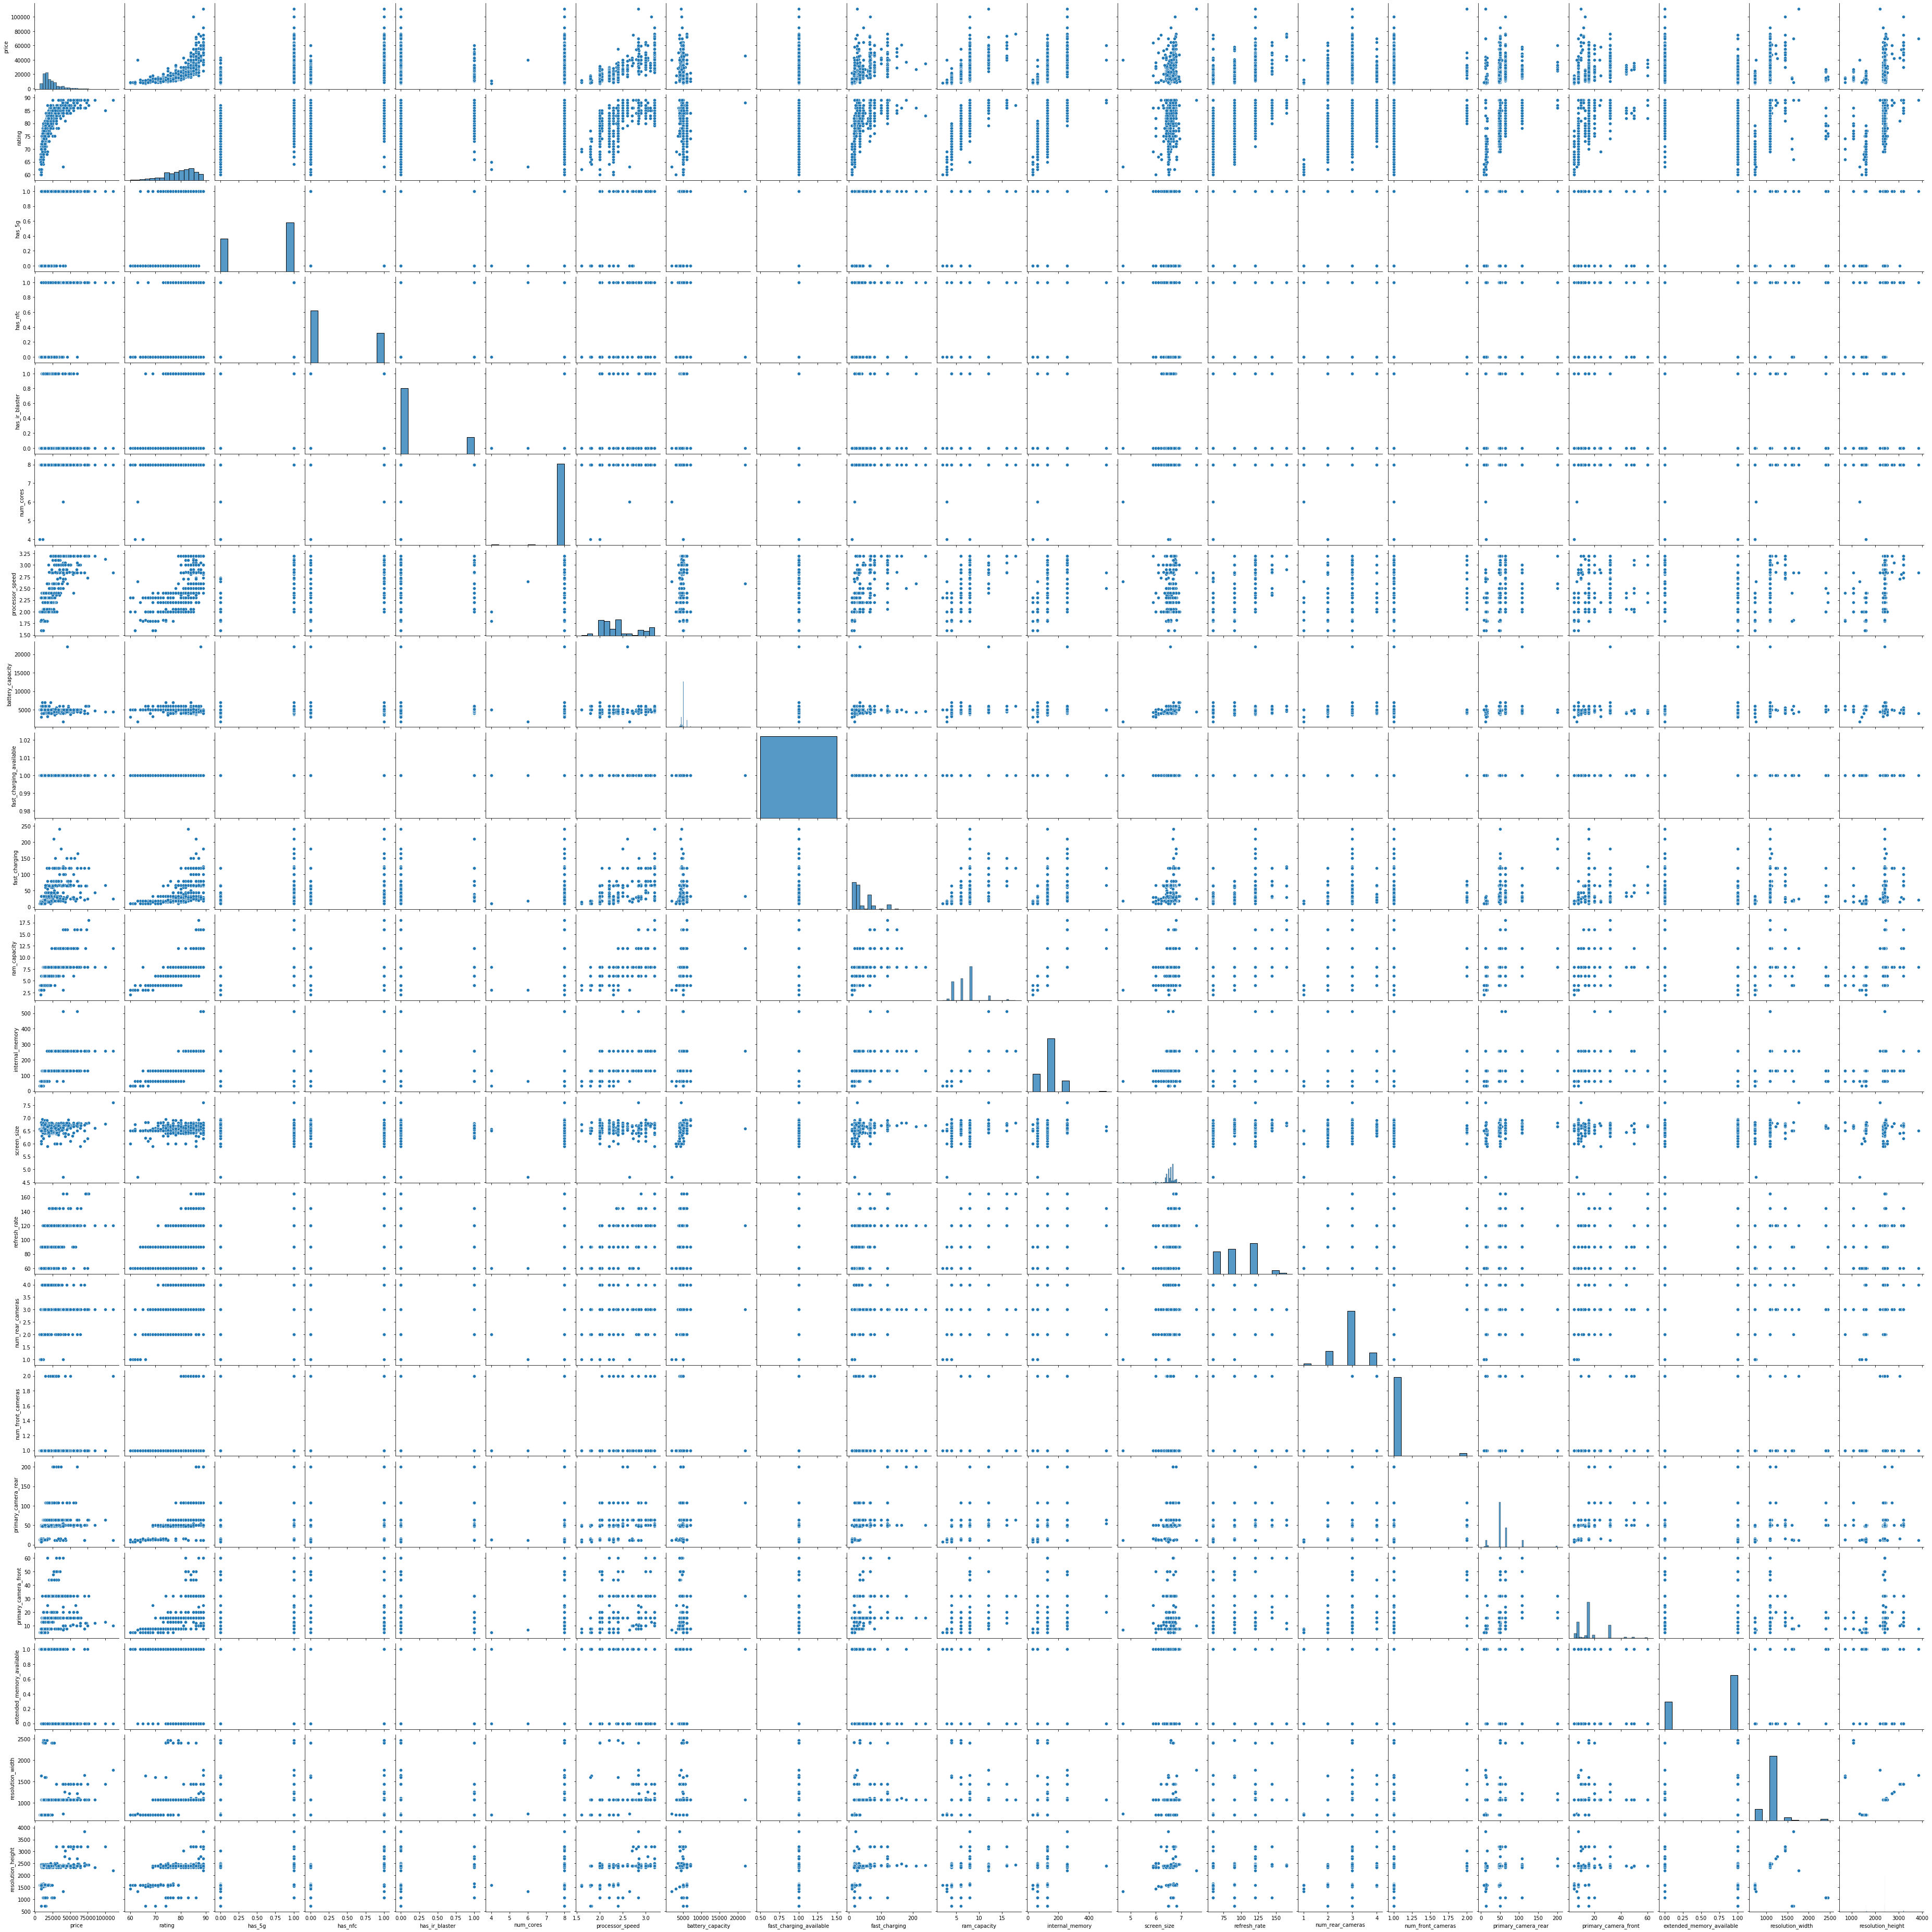

In [12]:
sns.pairplot(dataset)

In [13]:
dataset_cleaned = dataset.dropna()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif():

    # Calculating VIF
    vif = pd.DataFrame(X)
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[0])]

    return (vif)


In [16]:
calc_vif(dataset[["price","processor_speed"]])

TypeError: calc_vif() takes 0 positional arguments but 1 was given

#### Independant Sample- Unpaired T Test
Diferrent Group(Male, Female) but same contion(salary)

In [ ]:
dataset[dataset['gender']=='F']["salary"]

In [ ]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['salary']
female = dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male, female)

#### Dependant Sample-Paired T_Test
Same Group(Male) but Different Condition(ssc_p,hsc_p)


In [ ]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


In [ ]:
# Hypothesis Testing

In [ ]:
#Statement: Test whether SSC_p of male and HSC_P of Male is Same?

In [ ]:
#Null hypothesis=There is no similarity between 10th pass mark of male  and 12th pass mark of male

In [ ]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


# Reject Null hypothesis p<0.05
# Accept Null Hypothesi and Reject Alternate hypothsis

# ANAVO : Analysis of Variance

In [ ]:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])
